DATA VISUALIZATION

In [98]:
#importing various python libaries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
#importing our data set
data=pd.read_csv('/content/sample_data/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
#check for null values in the dataset
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [58]:
#check for overall data description
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [59]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [100]:
#checking the correlation of our data
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.266342,0.647067,0.080112,0.117414,-0.140419,-0.101463,0.591414,-0.647036,0.167786,-0.091533,0.113414
volatile acidity,-0.266342,1.000000,-0.568010,0.006189,0.062356,-0.002445,0.086311,0.003663,0.230197,-0.245605,-0.224304,-0.363475
citric acid,0.647067,-0.568010,1.000000,0.142790,0.185909,-0.064924,0.034083,0.336239,-0.535667,0.301492,0.112680,0.232439
residual sugar,0.080112,0.006189,0.142790,1.000000,0.055610,0.187049,0.203028,0.258646,-0.079033,0.005527,0.042075,0.013732
chlorides,0.117414,0.062356,0.185909,0.055610,1.000000,0.005562,0.047400,0.170323,-0.243249,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.140419,-0.002445,-0.064924,0.187049,0.005562,1.000000,0.667666,-0.001621,0.082127,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.101463,0.086311,0.034083,0.203028,0.047400,0.667666,1.000000,0.115199,-0.071639,0.042947,-0.205654,-0.185100
density,0.591414,0.003663,0.336239,0.258646,0.170323,-0.001621,0.115199,1.000000,-0.263398,0.138009,-0.482528,-0.172621
pH,-0.647036,0.230197,-0.535667,-0.079033,-0.243249,0.082127,-0.071639,-0.263398,1.000000,-0.191623,0.160627,-0.077170
sulphates,0.167786,-0.245605,0.301492,0.005527,0.371260,0.051658,0.042947,0.138009,-0.191623,1.000000,0.093595,0.251397


In [60]:
#check for wine with highest alcohol content
fig=px.bar(data, x='quality', y='alcohol', title='quality of wine against alcohol')
fig.show()

In [61]:
#check for wine with highest residual sugar
fig=px.bar(data, x='quality', y='residual sugar', title='quality of wine against residual sugar')
fig.show()

In [126]:
#check for wine with the highest pH level
fig=px.bar(data, x='quality', y='pH', title='quality of wine against pH')
fig.show()

MODEL PREDICTION

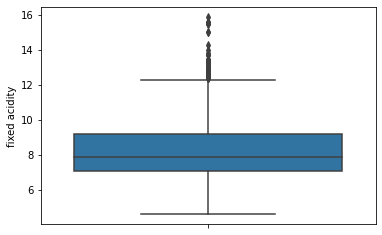

In [63]:
#cheking for existing outliers in the features
sns.boxplot(y=data['fixed acidity']);
plt.show()

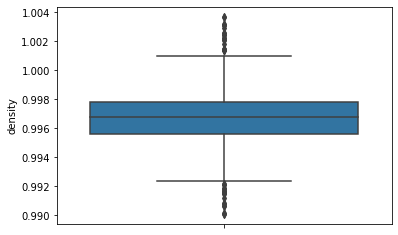

In [64]:
sns.boxplot(y=data['density']);
plt.show()

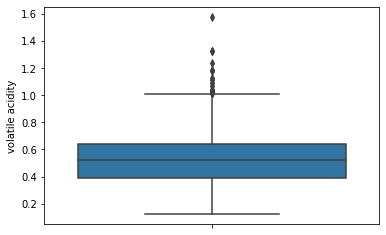

In [65]:
sns.boxplot(y=data['volatile acidity']);
plt.show()

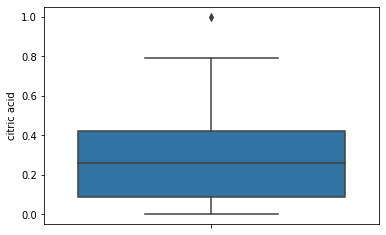

In [66]:
sns.boxplot(y=data['citric acid']);
plt.show()

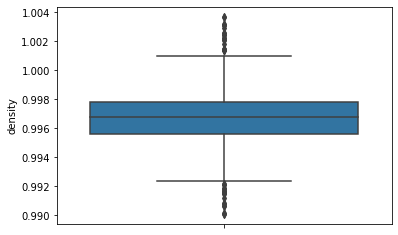

In [67]:
sns.boxplot(y=data['density']);
plt.show()

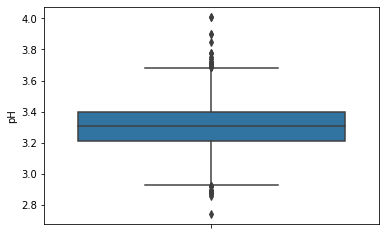

In [68]:
sns.boxplot(y=data['pH']);
plt.show()

In [69]:
fixed_acidity=data['fixed acidity']
volatile_acidity=data['volatile acidity']
citric_acid=data['citric acid']
density=data['density']
pH=data['pH']
outliers= []
def detect_outliers_iqr(df):
  df=df.sort_values()
  Q1=np.percentile(df, 25)
  Q3=np.percentile(df, 75)
  IQR=Q3-Q1
  lower_bound = Q1 - (1.5*IQR)
  upper_bound = Q3 + (1.5*IQR)
  for i in df:
    if (i<lower_bound or i>upper_bound):
      outliers.append(i)
  return outliers
sample_outliers_size= detect_outliers_iqr(fixed_acidity)
out1=pd.array(sample_outliers_size) 
out1

<FloatingArray>
[12.4, 12.4, 12.4, 12.4, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.6, 12.6,
 12.6, 12.6, 12.7, 12.7, 12.7, 12.7, 12.8, 12.8, 12.8, 12.8, 12.8, 12.9, 12.9,
 13.0, 13.0, 13.0, 13.2, 13.2, 13.2, 13.3, 13.3, 13.3, 13.4, 13.5, 13.7, 13.7,
 13.8, 14.0, 14.3, 15.0, 15.0, 15.5, 15.5, 15.6, 15.6, 15.9]
Length: 49, dtype: Float64

In [115]:
sample_outliers_size= detect_outliers_iqr(volatile_acidity)
out2=pd.array(sample_outliers_size)
sample_outliers_size= detect_outliers_iqr(citric_acid)
out3=pd.array(sample_outliers_size)
sample_outliers_size= detect_outliers_iqr(density)
out8=pd.array(sample_outliers_size)
sample_outliers_size= detect_outliers_iqr(pH)
out9=pd.array(sample_outliers_size)
out10=pd.array(sample_outliers_size)
print(out2,out3,out8,out9,out10)

<FloatingArray>
[12.4, 12.4, 12.4, 12.4, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
 ...
 3.72, 3.74, 3.75, 3.78, 3.78, 3.85,  3.9,  3.9, 4.01, 4.01]
Length: 149, dtype: Float64 <FloatingArray>
[12.4, 12.4, 12.4, 12.4, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
 ...
 3.72, 3.74, 3.75, 3.78, 3.78, 3.85,  3.9,  3.9, 4.01, 4.01]
Length: 149, dtype: Float64 <FloatingArray>
[12.4, 12.4, 12.4, 12.4, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
 ...
 3.72, 3.74, 3.75, 3.78, 3.78, 3.85,  3.9,  3.9, 4.01, 4.01]
Length: 149, dtype: Float64 <FloatingArray>
[12.4, 12.4, 12.4, 12.4, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
 ...
 3.72, 3.74, 3.75, 3.78, 3.78, 3.85,  3.9,  3.9, 4.01, 4.01]
Length: 149, dtype: Float64 <FloatingArray>
[12.4, 12.4, 12.4, 12.4, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
 ...
 3.72, 3.74, 3.75, 3.78, 3.78, 3.85,  3.9,  3.9, 4.01, 4.01]
Length: 149, dtype: Float64


In [117]:
data['fixed acidity']= data['fixed acidity'].replace(out1, np.nan)
data['volatile acidity']= data['volatile acidity'].replace(out2, np.nan)
data['citric acid']= data['citric acid'].replace(out3, np.nan)
data['density']= data['density'].replace(out8, np.nan)
data['pH']= data['pH'].replace(out9, np.nan)

In [116]:
data.isna().sum()

fixed acidity           49
volatile acidity        19
citric acid              1
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                 55
pH                      35
sulphates                0
alcohol                  0
quality                  0
dtype: int64

In [73]:
data_new= data.dropna(how='any')
data_new.shape

(1469, 12)

In [77]:
#assigning features and target to a variable
x=np.array(data_new[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
y=np.array(data_new['quality'])

In [78]:
#splitting the data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [119]:
#standardize the features
scaler= StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [120]:
#selecting the best value for our n-neighbors
training_accuracy=[]
test_accuracy=[]
neighbors=range(1,11)
for number_of_neighbors in neighbors:
  KNN= KNeighborsClassifier(n_neighbors=number_of_neighbors)
  KNN.fit(x_train,y_train)
  training_accuracy.append(KNN.score(x_train,y_train))
  test_accuracy.append(KNN.score(x_test,y_test))

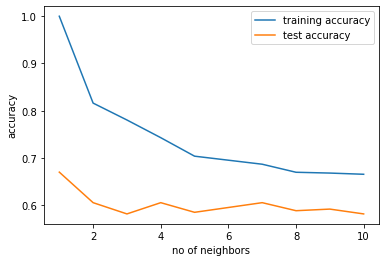

In [121]:
#plotting the calculated accuracy level
plt.plot(neighbors, training_accuracy, label='training accuracy')
plt.plot(neighbors, test_accuracy, label='test accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of neighbors')
plt.legend()
plt.show()

from the above, the best value for our n_neighbor is 1

In [122]:
classifier=KNeighborsClassifier(n_neighbors=(1))
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [123]:
#predicting using the test data
y_pred=classifier.predict(x_test)
y_pred

array([6, 6, 7, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 7, 6, 7, 6, 5, 4, 6, 7, 6,
       6, 5, 7, 5, 6, 5, 4, 6, 5, 5, 7, 7, 5, 6, 5, 6, 6, 7, 6, 5, 6, 6,
       4, 5, 5, 5, 7, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 7, 5, 5, 6, 5, 7, 5,
       5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 7, 6,
       5, 7, 7, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6,
       5, 6, 4, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 7, 6, 6, 5, 5, 5, 6, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 4, 5, 6,
       5, 5, 7, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 5, 6, 6, 5, 5, 5,
       5, 5, 6, 7, 6, 5, 7, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 7, 5, 6, 7, 6, 5, 5, 6, 5, 7, 5, 6, 5, 7, 6, 5, 6, 6, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 7, 5, 6, 5, 5, 6, 7, 7, 6, 6, 5, 6, 4, 5, 5,
       6, 6, 7, 7, 5, 7, 5, 8, 6, 6, 5, 5, 6, 6, 4, 6, 6, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 7, 5, 5, 5, 6, 5, 5, 5, 6, 7, 6, 6,
       6, 5, 5, 5, 5, 5, 6, 7])

In [124]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.12      0.12         8
           5       0.75      0.72      0.73       138
           6       0.66      0.68      0.67       115
           7       0.56      0.70      0.62        27
           8       0.00      0.00      0.00         5

    accuracy                           0.67       294
   macro avg       0.35      0.37      0.36       294
weighted avg       0.66      0.67      0.67       294

[[ 0  1  0  0  0  0]
 [ 0  1  2  5  0  0]
 [ 0  6 99 31  2  0]
 [ 0  0 26 78 10  1]
 [ 0  0  4  4 19  0]
 [ 0  0  1  1  3  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [125]:
acc_sc = (accuracy_score(y_test, y_pred))
acc_sc

0.6700680272108843

This is how you can predict the quality of a wine with machine learning